# Veri Seti Hakkında

US Accidents (2016–2023) veri seti, yaklaşık 7.7 milyon trafik kazası kaydı içermektedir. Bu veri seti, 2016'dan 2023'e kadar olan dönemi kapsayan geniş bir zaman aralığını ve çeşitli özellikleri içermektedir

In [ ]:
# kutuphaneleri iceri aktarıyoruz
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.width', 500)

#!pip install missingno
import missingno as msno
from datetime import date

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler

# jupyter notebook uyarı mesajları verir.bunları kapamak için yazılmış kod
import warnings
warnings.filterwarnings("ignore")

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/us-accidents/US_Accidents_March23.csv


In [ ]:
# veri setini içeri aktarıyoruz
data=pd.read_csv('/kaggle/input/us-accidents/US_Accidents_March23.csv')

# Keşifsel Veri Analizi (EDA)  

Veri setinin yapısını anlamak ve olası sorunları (eksik veri, aykırı değerler vb.) tespit etmek için kullanılır.  
İstatistiksel özetler, verinin nasıl dağıldığını ve hangi özelliklere sahip olduğunu anlamaya yardımcı olur.

In [ ]:
# ilk 5 veriyi gözlemleriz
data.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Street,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865,-84.059,NaN,NaN,0.010,Right lane blocked due to accident on I-70 Eas...,I-70 E,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.900,NaN,91.000,29.680,10.000,Calm,NaN,0.020,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928,-82.831,NaN,NaN,0.010,Accident on Brice Rd at Tussing Rd. Expect del...,Brice Rd,Reynoldsburg,Franklin,OH,43068-3402,US,US/Eastern,KCMH,2016-02-08 05:51:00,37.900,NaN,100.000,29.650,10.000,Calm,NaN,0.000,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063,-84.033,NaN,NaN,0.010,Accident on OH-32 State Route 32 Westbound at ...,State Route 32,Williamsburg,Clermont,OH,45176,US,US/Eastern,KI69,2016-02-08 06:56:00,36.000,33.300,100.000,29.670,10.000,SW,3.500,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.748,-84.206,NaN,NaN,0.010,Accident on I-75 Southbound at Exits 52 52B US...,I-75 S,Dayton,Montgomery,OH,45417,US,US/Eastern,KDAY,2016-02-08 07:38:00,35.100,31.000,96.000,29.640,9.000,SW,4.600,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.628,-84.188,NaN,NaN,0.010,Accident on McEwen Rd at OH-725 Miamisburg Cen...,Miamisburg Centerville Rd,Dayton,Montgomery,OH,45459,US,US/Eastern,KMGY,2016-02-08 07:53:00,36.000,33.300,89.000,29.650,6.000,SW,3.500,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day


In [ ]:
# veri seti hakkında bilgiler edindiğimiz fonksiyon
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 46 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   Severity               int64  
 3   Start_Time             object 
 4   End_Time               object 
 5   Start_Lat              float64
 6   Start_Lng              float64
 7   End_Lat                float64
 8   End_Lng                float64
 9   Distance(mi)           float64
 10  Description            object 
 11  Street                 object 
 12  City                   object 
 13  County                 object 
 14  State                  object 
 15  Zipcode                object 
 16  Country                object 
 17  Timezone               object 
 18  Airport_Code           object 
 19  Weather_Timestamp      object 
 20  Temperature(F)         float64
 21  Wind_Chill(F)          float64
 22  Humidity(%)       

In [ ]:
# object turunde verilmis. Veri tipini tarih olarak degistiriyoruz.
data["Start_Time"]=pd.to_datetime(data["Start_Time"],errors="coerce")
data["End_Time"]=pd.to_datetime(data["End_Time"],errors="coerce")
data["Weather_Timestamp"]=pd.to_datetime(data["Weather_Timestamp"],errors="coerce")

In [ ]:
# veri setimizle ilgili bazi istatistiksel verilere ulaşıyoruz.
data.describe()

,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,7728394.000,6985228,6985228,7728394.000,7728394.000,4325632.000,4325632.000,7728394.000,7608166,7564541.000,5729375.000,7554250.000,7587715.000,7551296.000,7157161.000,5524808.000
mean,2.212,2020-03-21 21:49:59.056442112,2020-03-22 04:56:51.646933248,36.201,-94.703,36.262,-95.726,0.562,2020-06-02 10:06:41.888675840,61.663,58.251,64.831,29.539,9.090,7.685,0.008
min,1.000,2016-01-14 20:18:33,2016-02-08 06:37:08,24.555,-124.624,24.566,-124.546,0.000,2016-01-14 19:51:00,-89.000,-89.000,1.000,0.000,0.000,0.000,0.000
25%,2.000,2018-09-17 02:20:31.750000128,2018-09-17 05:23:37.500000,33.400,-117.219,33.462,-117.754,0.000,2018-11-20 18:35:00,49.000,43.000,48.000,29.370,10.000,4.600,0.000
50%,2.000,2020-06-23 13:37:23.500000,2020-06-23 15:20:42,35.824,-87.767,36.183,-88.028,0.030,2020-11-10 13:53:00,64.000,62.000,67.000,29.860,10.000,7.000,0.000
75%,2.000,2021-10-28 15:44:07,2021-10-29 14:57:46.500000,40.085,-80.354,40.179,-80.247,0.464,2022-01-19 14:27:00,76.000,75.000,84.000,30.030,10.000,10.400,0.000
max,4.000,2023-03-31 23:30:00,2023-03-31 23:59:00,49.002,-67.113,49.075,-67.109,441.750,2023-03-31 23:53:00,207.000,207.000,100.000,58.630,140.000,1087.000,36.470
std,0.488,NaN,NaN,5.076,17.392,5.273,18.108,1.777,NaN,19.014,22.390,22.821,1.006,2.688,5.425,0.110


Her bir sütunun ortalama (mean), maksimum (max), standart sapma (std) ve minimum (min) değerlerinin yanı sıra %25, %50 ve %75 gibi ifadeler bulunmaktadır.

In [ ]:
# severity icin bensersiz olusum sayisi
data['Severity'].value_counts(normalize=True)

Severity
2   0.797
3   0.168
4   0.026
1   0.009
Name: proportion, dtype: float64

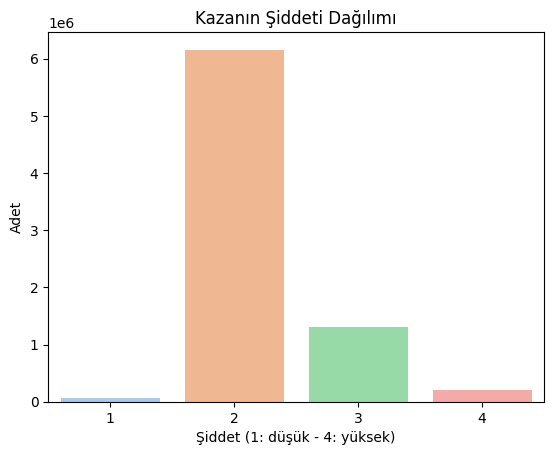

In [ ]:
# kazanın siddetinin dagılım grafigi
sns.countplot(x='Severity',data=data,palette="pastel")
plt.title("Kazanın Şiddeti Dağılımı")
plt.xlabel("Şiddet (1: düşük - 4: yüksek)")
plt.ylabel("Adet")
plt.show()

Hedef değişkenim olan Severity oranlarına baktığımızda 2 numaralı sınıfın çok fazla olduğu gözlenmektedir. Dağılımın dengesizliği söz konusudur. Geliştireceğim model 2 numaralı tahmin bulunma ihtimali yüksek olur. Oversampling yapılabilir.

**Oversampling**, verilerin dağılımı düzensiz olduğu zaman verilerin dağılımına müdahale etmemize olanak sağlayan bir yöntemdir. Verisi az olan etiketin verilerini random bir şekilde artırarak etiketlerdeki veri sayısını eşitliyoruz.

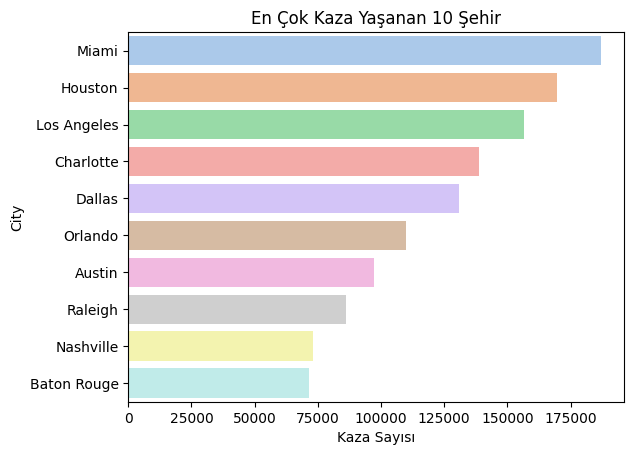

In [ ]:
# konuma göre en cok kaza olan ilk 10 sehirlerin dagılımı
a_cities=data['City'].value_counts().head(10)
sns.barplot(x=a_cities.values,y=a_cities.index,palette="pastel")
plt.title('En Çok Kaza Yaşanan 10 Şehir')
plt.xlabel('Kaza Sayısı')
plt.show()

Grafikte hangi bölgelerde kaza oranı daha yüksek gözlenmektedir.

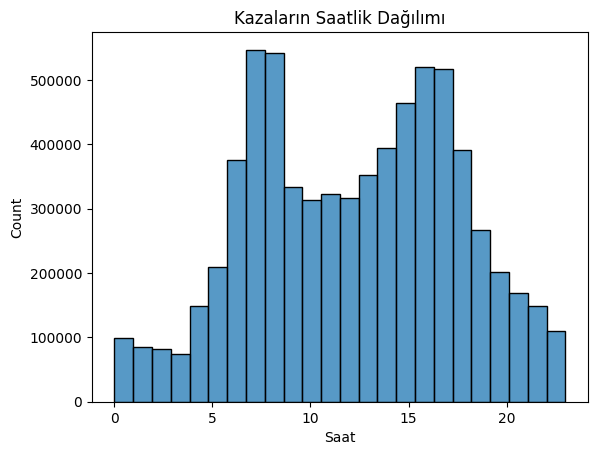

In [ ]:
# kazaların saatlik dağılımı
data['Hour']=data['Start_Time'].dt.hour
sns.histplot(data['Hour'],bins=24,kde=False)
plt.title('Kazaların Saatlik Dağılımı')
plt.xlabel('Saat')
plt.show()

Kazaların saatlik dağılımı gösterilmektedir. Hangi saatlerde kaza oranı yüksek olduğu gözlenmektedir.  
Gündüz 7-8 ve akşam 17-18 yoğun olduğu söylenebilir.

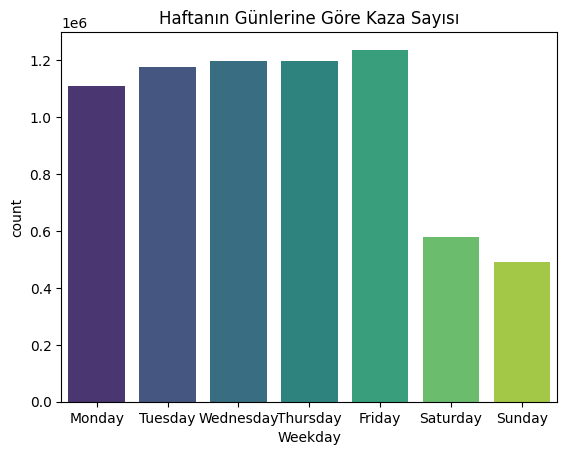

In [ ]:
# kazaların günlük dağılımı
data['Weekday']=data['Start_Time'].dt.day_name()
sns.countplot(data=data, x='Weekday',order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],palette="viridis")
plt.title('Haftanın Günlerine Göre Kaza Sayısı')
plt.show()

Grafikte hafta içi kaza oranların daha yüksek olduğu gözlenmektedir. Fakat kaza oranı kaza şiddetiyle doğru orantılı etkilemiyor olabilir. Haftasonu olan kazaların şiddetleri yüksek olabilir.

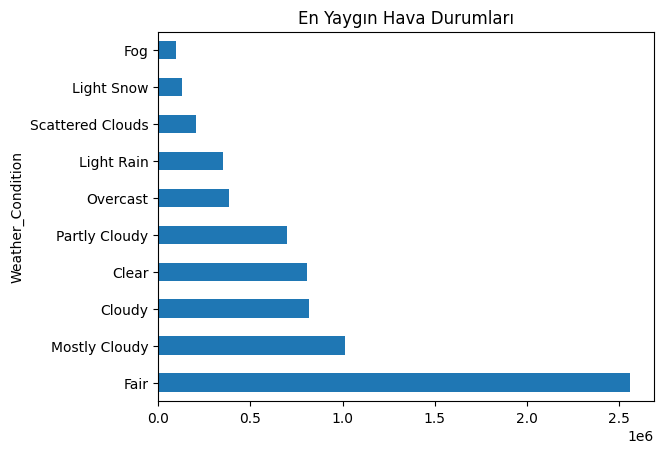

In [ ]:
# hava durumunu dağılımı
data['Weather_Condition'].value_counts().head(10).plot(kind='barh')
plt.title("En Yaygın Hava Durumları")
plt.show()

Hava durumlarına göre kazanın şiddeti değişebilir. Yağmurlu, sisli havalar kazaya sebep olabilir.

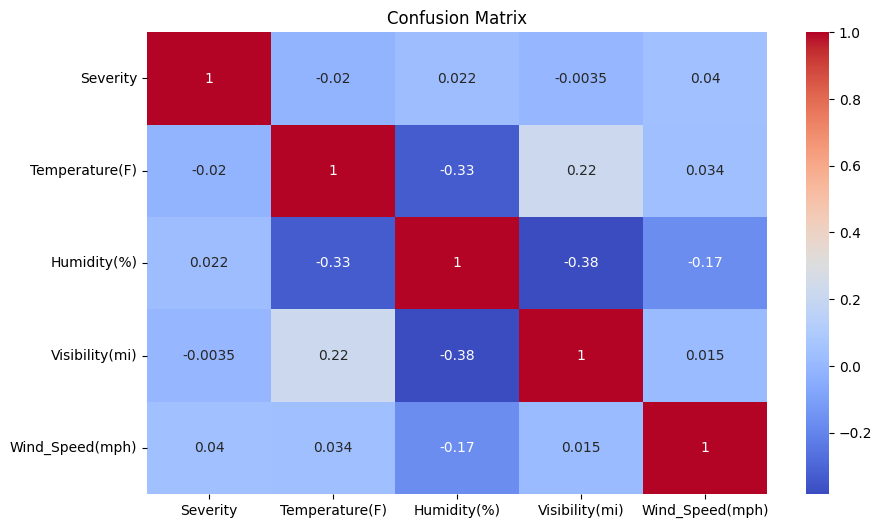

In [ ]:
# korelasyon matrisi
cols=['Severity','Temperature(F)','Humidity(%)','Visibility(mi)','Wind_Speed(mph)']
plt.figure(figsize=(10,6))
sns.heatmap(data[cols].corr(),annot=True,cmap='coolwarm')
plt.title("Confusion Matrix")
plt.show()

Korelasyon matrisi sayesinde hedef değişkenimizle arasındaki ilişkiye bakabiliriz. Korelasyon katsayısının sıfıra yaklaşması değişkenler arasında zayıf ilişkinin varlığını gösterir.

# Feature Engineering

In [ ]:
# Veri setindeki kategorik, numerik ve kategorik fakat kardinal değişkenlerin isimlerini verir.
def grab_col_names (dataframe, cat_trh=10, car_thr=20):
    cat_cols= [col for  col in dataframe.columns if dataframe[col].dtype =='O']
    num_but_cat=[col for col in dataframe.columns if dataframe[col].nunique() < cat_trh and dataframe[col].dtype != 'O']
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_thr and dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    num_cols= [col for col in  dataframe.columns if dataframe[col].dtype != 'O']
    num_cols = [col for col in num_cols if col not in num_but_cat]

    return cat_cols, num_cols, cat_but_car

cat_cols, num_cols, cat_but_car = grab_col_names(data)

In [ ]:
# hava durumu degiskeninin eşsiz deger sayılarını gösterir.
print(data['Weather_Condition'].value_counts())

Weather_Condition
Fair                         2560802
Mostly Cloudy                1016195
Cloudy                        817082
Clear                         808743
Partly Cloudy                 698972
                              ...   
Heavy Sleet / Windy                1
Sand / Windy                       1
Heavy Rain Shower / Windy          1
Blowing Snow Nearby                1
Drifting Snow                      1
Name: count, Length: 144, dtype: int64


In [ ]:
# hava durumu degerlerinin gruplamak icin fonksiyonlastırma
def group_weather(condition):
    if pd.isnull(condition):
        return 'Unknown'
    condition=condition.lower()
    if 'rain' in condition or 'storm' in condition:
        return 'Rainy'
    elif 'snow' in condition or 'ice' in condition:
        return 'Snowy'
    elif 'cloud' in condition or 'overcast' in condition:
        return 'Cloudy'
    elif 'fog' in condition or 'haze' in condition:
        return 'Foggy'
    elif 'clear' in condition or 'fair' in condition:
        return 'Clear'
    else:
        return 'Other'

data['Weather_Condition']=data['Weather_Condition'].apply(group_weather)

In [ ]:
# kaza oranının görüldügü en çok 10 sehirle sınırlamak, kategori sayısını filtre uygularız
a_states=data['State'].value_counts().nlargest(10).index
data['a_states']=data['State'].apply(lambda x:x if x in a_states else 'Other')

In [ ]:
#hedef degiskeni tahmin ederken anlamsız sütunlar tablodan çıkarılır
data=data.drop(['ID', 'Source', 'Description', 'Street','Country','Zipcode', 'Airport_Code','City','County','End_Time','Timezone'],axis=1)

# Aykırı Değer Analizi

In [ ]:
#eşik değeri belirleme fonksiyonu yazalım
def outlier_thresholds(dataframe, col_name, q1=0.25, q3=0.75):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

In [ ]:
#aykırı değer var mı yok mu fonksiyonu
def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

In [ ]:
cat_cols, num_cols, cat_but_car = grab_col_names(data)

In [ ]:
# nümerik degiskenlerimize aykırı değer var mı sorgusunu yapalım!
for col in num_cols:
    print(col, check_outlier(data, col))

Start_Time False
Start_Lat False
Start_Lng False
End_Lat False
End_Lng False
Distance(mi) True
Weather_Timestamp False
Temperature(F) True
Wind_Chill(F) True
Humidity(%) False
Pressure(in) True
Visibility(mi) True
Wind_Speed(mph) True
Precipitation(in) True
Hour False


In [ ]:
# aykırı deger kaldırma fonksiyonu
# alt ve üst limit dışındakileri kaldırma
def remove_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    df_without_outliers = dataframe[~((dataframe[col_name] < low_limit) | (dataframe[col_name] > up_limit))]
    return df_without_outliers

In [ ]:
# aykırı nümerik degiskenlerimizi kaldırıyoruz
for col in num_cols:
    data = remove_outlier(data, col)

In [ ]:
# aykırı deger kontrolü
for col in num_cols:
    print(col, check_outlier(data, col))

Start_Time False
Start_Lat True
Start_Lng False
End_Lat False
End_Lng False
Distance(mi) True
Weather_Timestamp False
Temperature(F) True
Wind_Chill(F) False
Humidity(%) False
Pressure(in) True
Visibility(mi) False
Wind_Speed(mph) False
Precipitation(in) False
Hour False


In [ ]:
# aykırı deger kendi degiskeniyle baskılama
def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

In [ ]:
# aykırı nümerik degiskenlerimizi baskılama
for col in num_cols:
    replace_with_thresholds(data, col)

In [ ]:
# aykırı deger kontrolü
for col in num_cols:
    print(col, check_outlier(data, col))

Start_Time False
Start_Lat False
Start_Lng False
End_Lat False
End_Lng False
Distance(mi) False
Weather_Timestamp False
Temperature(F) False
Wind_Chill(F) False
Humidity(%) False
Pressure(in) False
Visibility(mi) False
Wind_Speed(mph) False
Precipitation(in) False
Hour False


In [ ]:
# eksik değer sayısını gösterir
data.isnull().sum()

Severity                       0
Start_Time                295261
Start_Lat                      0
Start_Lng                      0
End_Lat                  2253032
End_Lng                  2253032
Distance(mi)                   0
State                          0
Weather_Timestamp          82396
Temperature(F)            105824
Wind_Chill(F)            1342278
Humidity(%)               109384
Pressure(in)               95912
Visibility(mi)            119769
Wind_Direction            111080
Wind_Speed(mph)           361301
Precipitation(in)        1517863
Weather_Condition              0
Amenity                        0
Bump                           0
Crossing                       0
Give_Way                       0
Junction                       0
No_Exit                        0
Railway                        0
Roundabout                     0
Station                        0
Stop                           0
Traffic_Calming                0
Traffic_Signal                 0
Turning_Lo

Son 3 satır değişkeni biz oluşturduk. Start_time değişkeninden türettiğimiz için oluşan eksik veri girişi aynıdır.

In [ ]:
# fazla bilgi iceren degiskenleri kaldırıyoruz.
data=data.drop(columns=['Start_Time','State'])

In [ ]:
cat_cols, num_cols, cat_but_car = grab_col_names(data)

In [ ]:
#eksik değerlerin frekansı
#eksikliklerin yüzdelikleri
(data.isnull().sum() / data.shape[0] * 100).sort_values(ascending=False)

End_Lat                 55.185
End_Lng                 55.185
Precipitation(in)       37.178
Wind_Chill(F)           32.878
Wind_Speed(mph)          8.850
Weekday                  7.232
Hour                     7.232
Visibility(mi)           2.934
Wind_Direction           2.721
Humidity(%)              2.679
Temperature(F)           2.592
Pressure(in)             2.349
Weather_Timestamp        2.018
Astronomical_Twilight    0.205
Nautical_Twilight        0.205
Civil_Twilight           0.205
Sunrise_Sunset           0.205
Traffic_Calming          0.000
Traffic_Signal           0.000
Severity                 0.000
Turning_Loop             0.000
Station                  0.000
Stop                     0.000
Crossing                 0.000
Roundabout               0.000
Railway                  0.000
No_Exit                  0.000
Junction                 0.000
Give_Way                 0.000
Start_Lat                0.000
Bump                     0.000
Amenity                  0.000
Weather_

In [ ]:
# eksik veri sayısı cok ve düsük katkılı verileri kaldırma
data.drop(columns=['End_Lat', 'End_Lng', 'Precipitation(in)', 'Wind_Chill(F)','Wind_Direction'], inplace=True)

In [ ]:
cat_cols, num_cols, cat_but_car = grab_col_names(data)

In [ ]:
#sayısal degiskenleri median(ortalama) ile kategorik degiskenler mode ile doldurulur
# axis=0 satırları, axis=1 sütunları ifade eder

# her bir eksik verinin kendi sütunundaki ortalama ile doldurulmasını saglar
for col in num_cols:
    data[col]=data[col].fillna(data[col].median())

for col in cat_cols:
    data[col]=data[col].fillna(data[col].mode()[0])

In [ ]:
# eksik veri kontrolü
missing = data.isnull().sum().sort_values(ascending=False)
print(missing[missing > 0])

Series([], dtype: int64)


# Encoding

**One hot encoding,** makine öğrenimi modellerinde kategorik değişkenleri kullanılabilir hale getirmek için bir dönüşüm yöntemidir.  

Bu yöntem, kategorik değişkenlerin farklı kategorilerini temsil eden yeni sütunlar oluşturur ve her bir gözlem için bu sütunlardan yalnızca birini 1 olarak ayarlarken diğerlerini 0 yapar.  

Bu sayede, kategorik değişkenler makine öğrenimi modellerinin anlayabileceği sayısal bir formata dönüştürülmüş olur.  

In [ ]:
# encoding işlemi öncesi ilk 5 veri gözlemi
data.head()

,Severity,Start_Lat,Start_Lng,Distance(mi),Weather_Timestamp,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Hour,Weekday,a_states
1,2,39.928,-82.831,0.010,2016-02-08 05:51:00,37.900,100.000,29.650,10.000,7.000,Rainy,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Day,6.000,Monday,Other
2,2,39.063,-84.033,0.010,2016-02-08 06:56:00,36.000,100.000,29.670,10.000,3.500,Cloudy,False,False,False,False,False,False,False,False,False,False,False,True,False,Night,Night,Day,Day,6.000,Monday,Other
13,2,39.791,-84.242,0.010,2016-02-08 08:56:00,36.000,89.000,29.650,10.000,5.800,Cloudy,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day,8.000,Monday,Other
17,2,39.752,-84.240,0.000,2016-02-08 08:56:00,36.000,89.000,29.650,10.000,5.800,Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,9.000,Monday,Other
18,2,39.741,-84.184,0.010,2016-02-08 09:38:00,37.400,93.000,29.630,10.000,6.900,Cloudy,False,False,True,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day,9.000,Monday,Other


**Label Encoding :** Aralarında bir hiyerarşik düzen varsa, sıra ilişkisi varsa, büyüklük küçüklük varsa kullanılır.  


True/False içeren veriler binary olduğu için encoding gerekmez.

In [ ]:
# Label encoding gündüz-gece
label_cols = ['Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight']
le = LabelEncoder()
for col in label_cols:
    data[col] = le.fit_transform(data[col])

In [ ]:
#One-Hot Encoding
data=pd.get_dummies(data,columns=['Weather_Condition','a_states','Weekday'])

In [ ]:
data.head()

,Severity,Start_Lat,Start_Lng,Distance(mi),Weather_Timestamp,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Hour,Weather_Condition_Clear,Weather_Condition_Cloudy,Weather_Condition_Foggy,Weather_Condition_Other,Weather_Condition_Rainy,Weather_Condition_Snowy,Weather_Condition_Unknown,a_states_CA,a_states_FL,a_states_MN,a_states_NC,a_states_NY,a_states_OR,a_states_Other,a_states_PA,a_states_SC,a_states_TX,a_states_VA,Weekday_Friday,Weekday_Monday,Weekday_Saturday,Weekday_Sunday,Weekday_Thursday,Weekday_Tuesday,Weekday_Wednesday
1,2,39.928,-82.831,0.010,2016-02-08 05:51:00,37.900,100.000,29.650,10.000,7.000,False,False,False,False,False,False,False,False,False,False,False,False,False,1,1,1,0,6.000,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False
2,2,39.063,-84.033,0.010,2016-02-08 06:56:00,36.000,100.000,29.670,10.000,3.500,False,False,False,False,False,False,False,False,False,False,False,True,False,1,1,0,0,6.000,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False
13,2,39.791,-84.242,0.010,2016-02-08 08:56:00,36.000,89.000,29.650,10.000,5.800,False,False,False,False,False,False,False,False,False,False,False,True,False,0,0,0,0,8.000,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False
17,2,39.752,-84.240,0.000,2016-02-08 08:56:00,36.000,89.000,29.650,10.000,5.800,False,False,False,False,False,False,False,False,False,False,False,False,False,0,0,0,0,9.000,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False
18,2,39.741,-84.184,0.010,2016-02-08 09:38:00,37.400,93.000,29.630,10.000,6.900,False,False,True,False,False,False,False,False,False,False,False,True,False,0,0,0,0,9.000,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False


# Machine Learning Modelling

**Train-Test Split**

Train dataset (eğitim veri seti), makine öğrenimi algoritmalarında kullanılmak üzere test ve train parçalarına ayrılır.
%80'i eğitim için, %20'u test için ayrılır.


In [ ]:
# tahminleyeceğimiz sütun
y=data['Severity']

# hedef degiskenimizi kaldırıyoruz.
X=data.drop('Severity',axis=1)

In [ ]:
X = X.drop(columns=["Weather_Timestamp"])

In [ ]:
# ölçekleme işlemi hem makine öğrenmesindeki aradaki uçurum olan sayıları birbirine, uygun matematiksel işlemlerle yaklaştırırken
# hem de verilerin işlenebiliriliğini artırıyor. yani matematiksel hesaplamalarda daha kolay oluyor
# bunlar da modelimizin daha başarılı olmasını ve çalışırken daha az kaynak tüketimini sağlıyor

from sklearn.preprocessing import MinMaxScaler

scalem=MinMaxScaler()
X=scalem.fit_transform(X)

print(X)

[[0.63666276 0.73038174 0.04545455 ... 0.         0.         0.        ]
 [0.60084364 0.70938527 0.04545455 ... 0.         0.         0.        ]
 [0.63097671 0.70573378 0.04545455 ... 0.         0.         0.        ]
 ...
 [0.40197041 0.09429931 0.85909091 ... 0.         0.         0.        ]
 [0.38046306 0.1186073  1.         ... 0.         0.         0.        ]
 [0.34009552 0.13064901 1.         ... 0.         0.         0.        ]]


Train test split, bir veri setini bir eğitim seti ve bir test seti olarak bölen bir model doğrulamasıdır.

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dtc=DecisionTreeClassifier(min_samples_split=11)
dtc.fit(X_train,y_train)
print(dtc.score(X_test,y_test))

0.8617690427319443


X_test içindeki veriler ile tahminleme yapıldığını bunun sonucunda ile X_test in gerçek sonuçlarının tutulduğu y_test ile karşılaştırılıp bir doğruluk oranı elde ettiğimizin daha somut hali

In [ ]:
y_predict=dtc.predict(X_test)

from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_predict)

0.8617690427319443

# Modelin Değerlendirilmesi

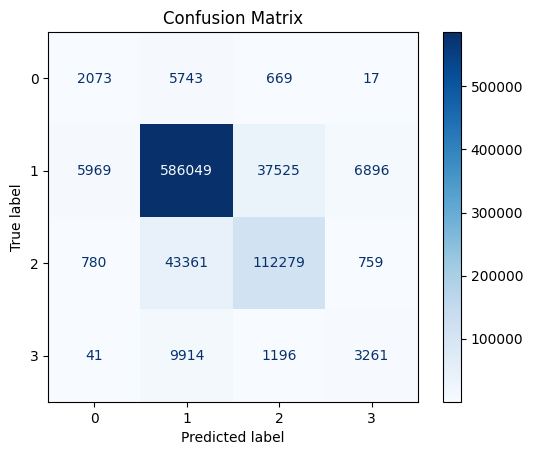

In [ ]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

cm=confusion_matrix(y_test,y_predict)
cmdisp=ConfusionMatrixDisplay(confusion_matrix=cm)
cmdisp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# sınıflandırma raporunu cıktı olarak verir.
# Doğruluk(accuracy), kesinlik(precision), duyarlılık(recall), F1 puanı(F1 score)
from sklearn.metrics import classification_report

print(classification_report(y_test,y_predict,digits=4))

              precision    recall  f1-score   support

           1     0.2339    0.2438    0.2388      8502
           2     0.9085    0.9208    0.9146    636439
           3     0.7403    0.7143    0.7271    157179
           4     0.2983    0.2263    0.2573     14412

    accuracy                         0.8618    816532
   macro avg     0.5452    0.5263    0.5344    816532
weighted avg     0.8583    0.8618    0.8599    816532

